## 시간측정 기능 소개

In [1]:
import pandas as pd

birdata = pd.read_csv('bird_tracking.csv')
birdata.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [2]:
birdata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [3]:
import datetime as dt
dt.datetime.today()

datetime.datetime(2019, 11, 24, 0, 2, 41, 762987)

In [4]:
time_1 = dt.datetime.today()

time_2 = dt.datetime.today()
time_2 - time_1

datetime.timedelta(microseconds=39)

In [5]:
date_str = birdata.date_time[0]
print(date_str)

2013-08-15 00:18:08+00


In [6]:
date_str[:-3]

'2013-08-15 00:18:08'

In [7]:
dt.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [8]:
a = dt.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')
print(a)

2013-08-15 00:18:08


In [9]:
timestamps = []
for k in range(len(birdata)): 
    timestamps.append(dt.datetime.strptime(birdata.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))
timestamps

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48),
 datetime.datetime(2013, 8, 15, 4, 3, 39),
 datetime.datetime(2013, 8, 15, 4, 18, 40),
 datetime.datetime(2013, 8, 15, 4, 33, 53),
 datetime.datetime(2013, 8, 15, 4, 49, 6),
 datetime.datetime(2013, 8, 15, 5, 4, 45),
 datetime.datetime(2013, 8, 15, 5, 20, 9),
 datetime.datetime(2013, 8, 15, 5, 35, 4),
 datetime.datetime(2013, 8, 15, 5, 49, 58),
 datetime.datetime(2013, 8, 15, 6, 4, 56),
 datetime.datetime(2013, 8, 15, 6, 19, 54),
 datetime.datetime(2013, 8, 15, 6, 34, 50),
 datetime.datetime(2013, 8, 15, 6, 49, 43),
 datetime.datetime(2013, 8, 15, 7, 4, 40)

In [10]:
timestamps[1] - timestamps[0]

datetime.timedelta(seconds=1799)

In [11]:
a = timestamps[1] - timestamps[0]
print(a)

0:29:59


In [12]:
birdata.index

RangeIndex(start=0, stop=61920, step=1)

In [13]:
birdata['timestamp'] = pd.Series(timestamps, index=birdata.index)
birdata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [14]:
bird_names = pd.unique(birdata.bird_name)
print(bird_names)

['Eric' 'Nico' 'Sanne']


In [15]:
times = birdata.timestamp[birdata.bird_name == 'Eric']
elapsed = [time - times[0] for time in times]
elapsed

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40'),
 Timedelta('0 days 03:45:31'),
 Timedelta('0 days 04:00:32'),
 Timedelta('0 days 04:15:45'),
 Timedelta('0 days 04:30:58'),
 Timedelta('0 days 04:46:37'),
 Timedelta('0 days 05:02:01'),
 Timedelta('0 days 05:16:56'),
 Timedelta('0 days 05:31:50'),
 Timedelta('0 days 05:46:48'),
 Timedelta('0 days 06:01:46'),
 Timedelta('0 days 06:16:42'),
 Timedelta('0 days 06:31:35'),
 Timedelta('0 days 06:46:32'),
 Timedelta('0 days 07:01:27'),
 Timedelta('0 days 07:16:23'),
 Timedelta('0 days 07:31:21'),
 Timedelta('0 days 07:46:48'),
 Timedelta('0 days 08:01:44'),
 Timedelta('0 days 08:16:39'),
 Timedelta('0 days 08:31:43'),
 Timedelta('0 days 08:46:55'),
 Timedelta('0 days 09:01:59'),
 Timedel

In [16]:
print(elapsed[0])
print(elapsed[1])
print(elapsed[100])

0 days 00:00:00
0 days 00:29:59
1 days 05:24:41


In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(elapsed) / dt.timedelta(days=1))
plt.xlabel('Observation')
plt.ylabel('Elapsed(days)');

In [18]:
ix = birdata.bird_name == 'Eric'
speed = birdata.speed_2d[ix]
print(speed.head())

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
Name: speed_2d, dtype: float64


Text(0, 0.5, 'Flying Speed')

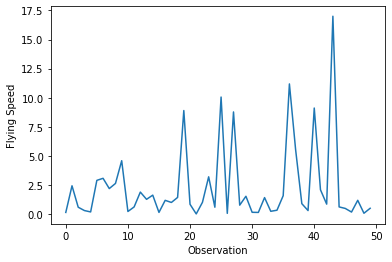

In [19]:
plt.plot(range(50), speed[:50]);
plt.xlabel('Observation')
plt.ylabel('Flying Speed')

In [20]:
speed[218]

0.786002544525143

In [21]:
speed[219]

nan

In [22]:
speed = np.array(speed)
speed = np.isnan(speed)
print(np.isnan(speed))

[False False False ... False False False]


In [23]:
np.isnan(speed).any()

False

In [24]:
speed = birdata.speed_2d[birdata.bird_name == 'Eric']
speed = np.array(speed)
np.isnan(speed)
print(np.isnan(speed))

[False False False ... False False False]


In [25]:
def getnan(s):
    for i, n in enumerate(s):
        if np.isnan(n):
            return i
        
ind = getnan(speed)
print(ind)

219


In [26]:
len(np.isnan(speed))

19795

## cartopy 설치

/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


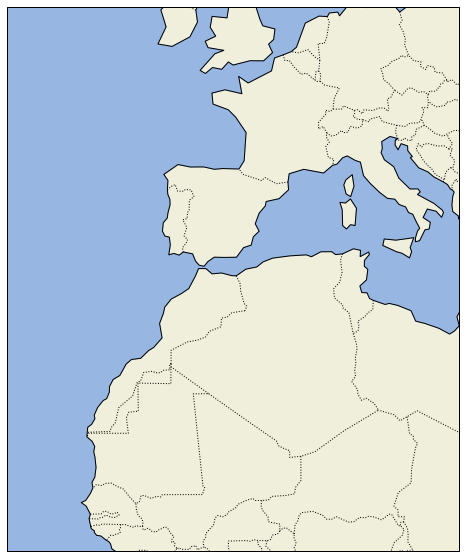

In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':');

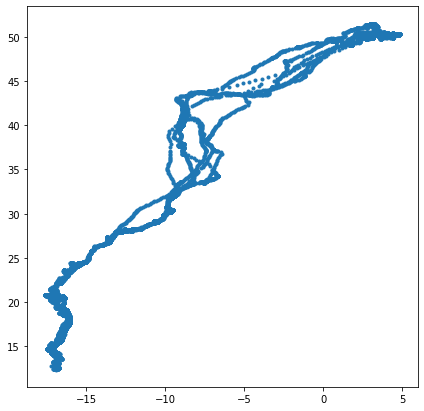

In [29]:
x, y = birdata.longitude, birdata.latitude
plt.figure(figsize=(7,7))
plt.plot(x, y, '.');

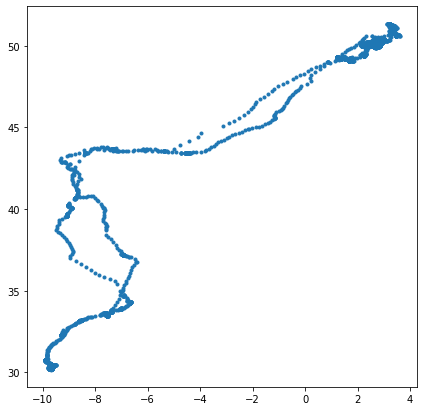

In [31]:
ix = birdata.bird_name == 'Eric'
x, y = birdata.longitude[ix], birdata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x, y, '.');

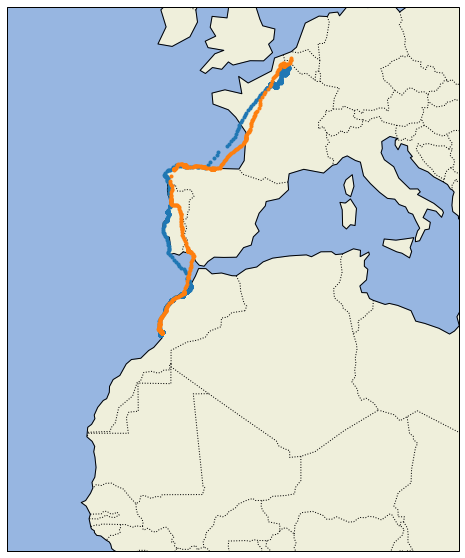

In [32]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':');

bird_names = pd.unique(birdata.bird_name)
ix = birdata['bird_name'] == 'Eric'
x, y = birdata.longitude[ix], birdata.latitude[ix]
ax.plot(x[0:17000], y[0:17000], '.', transform=ccrs.Geodetic());
ax.plot(x[17101:18600], y[17101:18600], '.', transform=ccrs.Geodetic());

Eric 19.618518967507736
Nico 32.60667661083755
Sanne 0.003127489104698823


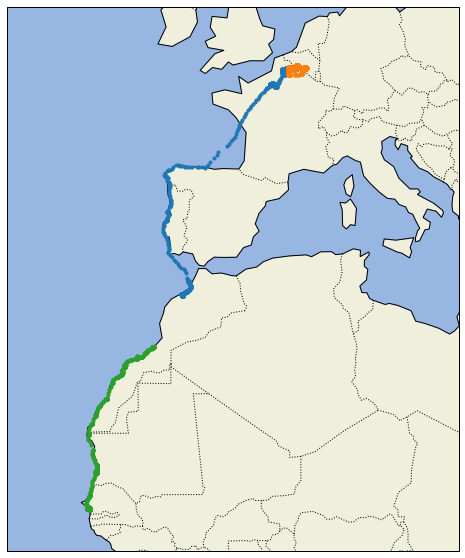

In [36]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':');

from scipy.spatial import distance

def euc(a, b):
    return distance.euclidean(a,b)

bird_names = pd.unique(birdata.bird_name)
sindex = 2500
eindex = 7500
ix = birdata['bird_name'] == 'Eric'
x, y = birdata.longitude[ix], birdata.latitude[ix]
i = [x[sindex], y[sindex]]
j = [x[eindex], y[eindex]]
ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Eric', euc(i,j))

ix = birdata['bird_name'] == 'Nico'
x, y = birdata.longitude[ix], birdata.latitude[ix]
start = len(x)
dest = len(y)
i = [x[start+sindex], y[start+sindex]]
j = [x[dest+eindex], y[dest+eindex]]
ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Nico', euc(i,j))

ix = birdata['bird_name'] == 'Sanne'
x, y = birdata.longitude[ix], birdata.latitude[ix]
start = start +  len(x)
dest = dest + len(y)
i = [x[start+sindex], y[start+sindex]]
j = [x[dest+eindex], y[dest+eindex]]
ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Sanne', euc(i,j))

In [37]:
sindex = 15000
eindx = 18300

longest = 0
distlist = []

ix = birdata['bird_name'] == 'Eric'
x, y = birdata.longitude[ix], birdata.latitude[ix]
i = [x[0], y[0]]
for ind in range(len(x) - 1):
    j = [x[ind+1], y[ind+1]]
    newlength = euc(i,j)
    distlist.append(newlength)
    if (euc(i,j) > longest):
        longest = newlength
        
print('Longest', longest)

Longest 22.599112725372304


In [40]:
bird_names = pd.unique(birdata.bird_name)
bird_dist = {}

start = 0
end = 0
count = 0
for bird_name in bird_names:
    ix = birdata['bird_name'] == bird_name
    x, y = birdata.longitude[ix], birdata.latitude[ix]
    longest = 0
    i = [x[start], y[start]]
    for ind in range(len(x) - 1):
        j = [x[start+ind+1], y[start+ind+1]]
        newlength = euc(i,j)
        distlist.append(newlength)
        if (euc(i,j) > longest):
            longest = newlength
            
    bird_dist[bird_names[count]] = longest
    count = count + 1
    start = start + len(x)
    dest = dest + len(x)
    
print(bird_dist)

{'Eric': 22.599112725372304, 'Nico': 43.44920181082738, 'Sanne': 40.87144067458034}
